In [1]:
from pyamaze import maze,agent,textLabel
from queue import PriorityQueue
import time
def heuristic(currentNode,goalNode): #h(n) L shape from current node to goal
    x1,y1=currentNode #current node
    x2,y2=goalNode #goal node          #4,3  h(n)= 5 Example node for h(n)
    return abs(x1-x2) + abs(y1-y2) #heuristic formula


def aStarSearch(m):
    startPosition=(m.rows,m.cols)#starting position is the size of the maze

    nodeQueue=PriorityQueue() #Highest priority to lowest priority
    nodeQueue.put((heuristic(startPosition,m._goal),heuristic(startPosition,m._goal),startPosition)) 
    #f(n),h(n),current node position. (if f(n) is same, then h(n) is checked) Inside the priorityQueue is all the possible solution nodes.

    g_score={cell:float('inf') for cell in m.grid} #cost from the start to the current node
    g_score[startPosition]=0
    f_score={cell:float('inf') for cell in m.grid} # total cost = g(n) + h(n)
    f_score[startPosition]=heuristic(startPosition,m._goal) #f(n) score of the starting node is h(n) since g(n) is 0

    
    aPath={}
    directionList = "EWNS"
    while not nodeQueue.empty():
        currentCell=nodeQueue.get()[2] #open.get the current position of the node
        if currentCell==m._goal:#if at goal, break
            break
        for direction in directionList: 
            if m.maze_map[currentCell][direction]==True:
                #if the E or S or N or W is available to go for the current node. for example E = 1 will execute if E
                #ChildCell is the neighboring cell from the current node cell
                if direction=='E':
                    neighborCell=(currentCell[0],currentCell[1]+1)
                if direction=='W':
                    neighborCell=(currentCell[0],currentCell[1]-1)
                if direction=='N':
                    neighborCell=(currentCell[0]-1,currentCell[1])
                if direction=='S':
                    neighborCell=(currentCell[0]+1,currentCell[1])

                temp_g_score=g_score[currentCell]+1 #+1 because inclusive of the starting node
                temp_f_score=temp_g_score+heuristic(neighborCell,m._goal)#f(n)

                if temp_f_score < f_score[neighborCell]: #check if the temp f(n) score is lower than the current neighbor f(n)                                            
                    g_score[neighborCell]= temp_g_score
                    f_score[neighborCell]= temp_f_score
                    nodeQueue.put((temp_f_score,heuristic(neighborCell,m._goal),neighborCell))
                    aPath[neighborCell]=currentCell
                    
    

    fwdPath={}
    cell=m._goal
    while cell!=startPosition:#path of the maze journey
        fwdPath[aPath[cell]]=cell
        cell=aPath[cell]
        
  
    return fwdPath

if __name__=='__main__':
    m=maze()
    m.CreateMaze(loadMaze= "maze4.csv")
    path=aStarSearch(m)

    a=agent(m,footprints=True)
    m.tracePath({a:path})
    l=textLabel(m,'A Star Path Length',len(path)+1)

    start_time = time.time()
    
    m.run()
    time1 = (time.time() - start_time)
    print("--- %s seconds ---" % time1)

--- 459.3289318084717 seconds ---


In [2]:
import time
def DFS(currentNode,destination,m,maxDepth,curList,path,explored):
    
    curList.append(currentNode) #to keep track of the path
    frontier = [] #to store child nodes of current node
    
    for d in "ESNW": #searching the child node for current node
        if m.maze_map[currentNode][d]==True:
            if d=="E":
                childCell=(currentNode[0], currentNode[1]+1)
            elif d=="W":
                childCell=(currentNode[0], currentNode[1]-1)
            elif d=="S":
                childCell=(currentNode[0]+1, currentNode[1])
            elif d=="N":
                childCell=(currentNode[0]-1, currentNode[1])

            if childCell in explored:
                continue

            explored.append(childCell) 
            frontier.append(childCell) 
 
    
    if currentNode==destination: 
        return True
    
    if maxDepth<=0: #if current depth has reached the depth 0, then stop the search and return false
        path.append(curList)
        return False
           
    for node in frontier: #do dfs for the child nodes of the current node
        if DFS(node,destination,m,maxDepth-1,curList,path,explored):
            path.append(curList)
            return True
        else:
            curList.pop()
    return False

def IDDFS(m,maxDepth):
    currentNode = (m.rows,m.cols) #start node
    destination = m._goal #goal node
    
    while maxDepth >= 0: #if maxDepth runs until goal is found
        path = list()
        curList = list()
        explored = list()
        frontier = list()
        explored = [(m.rows,m.cols)] #initialize explored list with the start node

        if DFS(currentNode,destination,m,maxDepth,curList,path,explored): #if true then it returns true with the path taken
            return True,path.pop()
        maxDepth += 1 # if not true, maxDepth is increased to 1 for the next iteration
    return False


from pyamaze import maze, agent

m = maze()
m.CreateMaze(loadMaze="maze4.csv")

a=agent(m,footprints=True)

val, path = IDDFS(m,0) #parameter: maze, depth 0 #return: True, path

m.tracePath({a:path})
start_time = time.time()
m.run()
print("--- %s seconds ---" % (time.time() - start_time))

--- 14.588948965072632 seconds ---


Text(0, 0.5, 'Algorithm Time')

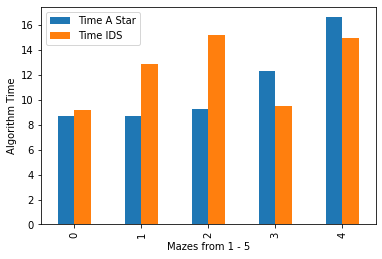

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("timefileastar.txt",names=["Time A Star"])
df["Time IDS"] = pd.read_csv("timefileids.txt",names=["Time IDS"])


timeplot = df.plot(kind= "bar")
timeplot.set_xlabel("Mazes from 1 - 5")
timeplot.set_ylabel("Algorithm Time")
